In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth, DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
path = "../../../data/"
file_name = path + "pctdata.csv"
df = pd.read_csv(file_name)

df0 = df[df['id_plane']==0]
df1 = df[df['id_plane']==1]
df2 = df[df['id_plane']==2]

df_center = df[df['id_x'].between(450,650)]
df_center = df_center[df_center['id_y'].between(200,400)]
df_center_xy = df_center.loc[:,['id_x','id_y']]

df_xy = df.loc[:,['id_x','id_y']]
df_xy0 = df0.loc[:,['id_x','id_y']]

## 3 Clustering method
### * K-Means Clustering
### * DBSCAN Clustering
### * Mean-Shift Clustering
</br></br>

### Using K-Means Clustering

* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans
* First, find the good number of cluster for KMeans

[7942175496.123623, 5070476679.359278, 3022971024.5196586, 2518538468.868543, 2096482931.2397563, 1751776604.0189748, 1517513845.8974774]


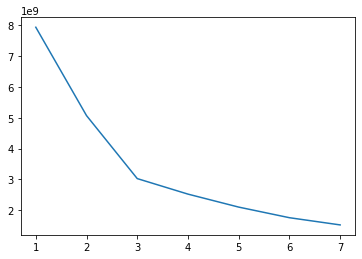

In [3]:
ks = range(1,8)
inertias = []
for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(df_xy)
    inertias.append(model.inertia_)
print(inertias)
plt.plot(range(1,8),inertias)
plt.show()

* I choose 3 for the number of cluster.

the center point of each cluster : 
 [[537.30368652 295.34962878]
 [817.39101592 289.69155926]
 [225.74560809 282.37732542]]


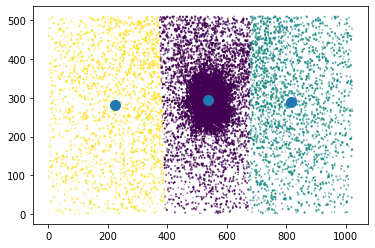

In [4]:
model = KMeans(n_clusters=3)
model.fit(df_xy)
kmean_center = model.cluster_centers_
center_x = []
center_y = []
for a,b in kmean_center:
    center_x.append(a)
    center_y.append(b)

print("the center point of each cluster : \n", kmean_center)
plt.scatter(df['id_x'],df['id_y'],s=0.005, c=model.labels_)
plt.scatter(center_x,center_y,s=100)
plt.show()

* Using 3clusters, i get the above graph
* There are 3 cluster centers. Left center and right center may have appeared due to the noise.
* Second center indicated there are a lot of points.

### Using DBSCAN Clustering

* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

(74595, 2)
[0]


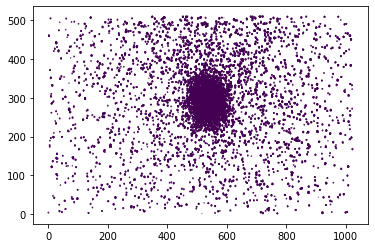

In [5]:
scale = StandardScaler()
scale.fit(df_xy0[['id_x','id_y']])
scaled_X = scale.transform(df_xy0[['id_x','id_y']])
df_xy_scaled = pd.DataFrame([scaled_X[:,0],scaled_X[:,1]]).transpose()
print(df_xy_scaled.shape)

dbscan = DBSCAN(eps=0.3, min_samples=5)
cluster = dbscan.fit_predict(df_xy_scaled)
print(np.unique(cluster))
plt.scatter(x=df_xy0['id_x'],y=df_xy0['id_y'],c=cluster, s=0.05)
plt.show()

### Using Mean-Shift clustering

* In KMeans clustering, I decide how many clusters will be in data. But in Mean-Shift clustering, I don't need to decide the number of clusters.
* https://www.mlguides.com/guides/clustering/mean-shift-clustering-tutorial-with-python-examples/
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html?highlight=meanshift#sklearn.cluster.MeanShift

(220138, 2)
the center point of each cluster : [[538.61539169 292.92638635]]


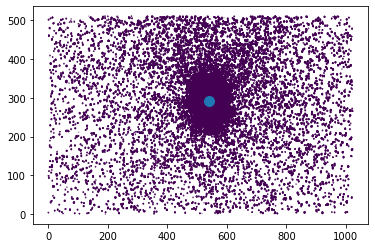

In [6]:
print(df_xy.shape)
# choose n_samples about 5% of the original data
bandwidth = estimate_bandwidth(df_xy, n_samples=10000)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(df_xy)
cluster_centers = ms.cluster_centers_
print("the center point of each cluster :",cluster_centers)
plt.scatter(df_xy['id_x'],df_xy['id_y'],s=0.05, c=ms.labels_)
plt.scatter(cluster_centers[0][0],cluster_centers[0][1], s=100)
plt.show()

* Mean-Shift clustering decide the number of cluster, which is 1.